In [756]:
'''
Data Science Assignment 3
Umar Khattak (uk50)
Matthew Lieberman (mrl196)

Problem 2: German Credit Dataset (72 points)

Given a CSV data file as represented by the sample file GermanCredit.csv  
Download GermanCredit.csv (1000 records), load it into a Pandas DataFrame, 
and perform the following tasks on it.
'''
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
dfpd = pd.read_csv("GermanCredit.csv")
dfpd

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [757]:
'''
Preprocessing (31 pt)

1. [8 pts] Drop the 3 columns that contribute the least to the dataset. 
These would be the columns with the highest number of non-zero 'none' values. 
Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, 
but for the rest of the analysis, you can call your code for n=3.)
'''
def problemOnePreprocessingPartOne(file, n = 3):
    with open(file) as openedFile:
        dfpd = pd.read_csv(openedFile)
        dic = defaultdict(list)
        
        for val in list(dfpd.columns):
             sum = dfpd[dfpd[val] == 'none'].shape[0]      
             dic[sum].append(val)
            
        lst  = list(dic.items())
        lst.sort(key = lambda x: x[0], reverse = True)
        answer = []
        
        for val in list(dict(lst).values()):
            answer.extend(val)
            
        return answer[0 : n] #so it only returns n cols that contribute least
            
problemOnePreprocessingPartOne("GermanCredit.csv")

['other_parties', 'other_payment_plans', 'own_telephone']

In [758]:
'''
2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes 
(‘). Remove the apostrophes.
'''
# dfpd = df
dfpd['checking_status'] = dfpd['checking_status'].str.replace("'","")
dfpd['credit_history'] = dfpd['credit_history'].str.replace("'","")
dfpd['purpose'] = dfpd['purpose'].str.replace("'","")
dfpd['savings_status'] = dfpd['savings_status'].str.replace("'","")
dfpd['employment'] = dfpd['employment'].str.replace("'","")
dfpd['personal_status'] = dfpd['personal_status'].str.replace("'","")
dfpd['other_parties'] = dfpd['other_parties'].str.replace("'","")
dfpd['property_magnitude'] = dfpd['property_magnitude'].str.replace("'","")
dfpd['other_payment_plans'] = dfpd['other_payment_plans'].str.replace("'","")
dfpd['housing'] = dfpd['housing'].str.replace("'","")
dfpd['job'] = dfpd['job'].str.replace("'","")
dfpd['own_telephone'] = dfpd['own_telephone'].str.replace("'","")
dfpd['foreign_worker'] = dfpd['foreign_worker'].str.replace("'","")
dfpd['class'] = dfpd['class'].str.replace("'","")

dfpd

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [759]:
'''
3. [5 pts] The checking_status column has values in 4 categories: 
'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 
'Low', 'Medium', and 'High' respectively.
'''
dfpd['checking_status'] = dfpd['checking_status'].str.replace("'","")
dfpd['checking_status'] = dfpd['checking_status'].str.replace("no checking","No Checking")
dfpd['checking_status'] = dfpd['checking_status'].str.replace("<0","Low")
dfpd['checking_status'] = dfpd['checking_status'].str.replace("0<=X<200","Medium")
dfpd['checking_status'] = dfpd['checking_status'].str.replace(">=200","High")
        
dfpd

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [760]:
'''
4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', 
'<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 
'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').
'''
dfpd['savings_status'] = dfpd['savings_status'].str.replace("'","")
dfpd['savings_status'] = dfpd['savings_status'].str.replace("no known savings","No Savings")
dfpd['savings_status'] = dfpd['savings_status'].str.replace("<100","Low")
dfpd['savings_status'] = dfpd['savings_status'].str.replace("100<=X<500","Medium")
dfpd['savings_status'] = dfpd['savings_status'].str.replace("500<=X<1000","High")
dfpd['savings_status'] = dfpd['savings_status'].str.replace(">=1000","High")

dfpd

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [761]:
'''
5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'
'''
dfpd['class'] = dfpd['class'].str.replace("'","")
dfpd['class'] = dfpd['class'].str.replace("good","1")
dfpd['class'] = dfpd['class'].str.replace("bad","0")

dfpd

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


In [762]:
'''
6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', 
and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.
'''
dfpd['employment'] = dfpd['employment'].str.replace("'","")
dfpd['employment'] = dfpd['employment'].str.replace("unemployed","Unemployed")
dfpd['employment'] = dfpd['employment'].str.replace("<1","Amateur")
dfpd['employment'] = dfpd['employment'].str.replace("1<=X<4","Professional")
dfpd['employment'] = dfpd['employment'].str.replace("4<=X<7","Experienced")
dfpd['employment'] = dfpd['employment'].str.replace(">=7","Expert")

dfpd    

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


In [763]:
'''
Analysis (17 pts)

For the following tasks, do preprocessing or changing of data types in the 
data frame as required.

[5 pts] Often we need to find correlations between categorical attributes, 
i.e. attributes that have values that fall in one of several categories, 
such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values 
across attributes, as in how many instances are "yes" for attr1 and "low" for 
attr2. A good way to find such counts is to use the Pandas crosstab (Links 
to an external site.) function. Do this for the following two counts.

a. [3 pts] Get the count of each category of foreign workers (yes and no) for 
each class of credit (good and bad).

'''
df = pd.read_csv("GermanCredit.csv")
cross = pd.crosstab(df.foreign_worker, df['class'])
cross

class,bad,good
foreign_worker,,
no,4,33
yes,296,667


In [764]:
'''
b. [2 pts] Similarly, get the count of each category of employment for 
each category of saving_status.
'''
crossb = pd.crosstab(df.employment, df.savings_status)
crossb

savings_status,'100<=X<500','500<=X<1000','<100','>=1000','no known savings'
employment,,,,,
'1<=X<4',33,26,210,18,52
'4<=X<7',24,9,100,9,32
'<1',17,5,120,7,23
'>=7',22,20,133,14,64
unemployed,7,3,40,0,12


In [765]:
'''
2. [4 pts] Find the average credit_amount of single males that have 
4<=X<7 years of employment. You can leave the raw result as is, no need 
for rounding.

'''
def problemTwoAnalysisPartTwo(file):
    with open(file) as openedFile:
        dfpd = pd.DataFrame(openedFile)
        count = 0
        creditSum = 0
        for row in dfpd.iterrows():
            for val in row[1]:
                x = val.split(",")
                if x[8] == "'male single'" and x[6] == "'4<=X<7'":
                    num = int(x[4])
                    creditSum = creditSum + num
                    count = count + 1
                else:
                    continue
        return creditSum/count

problemTwoAnalysisPartTwo("GermanCredit.csv")

4142.592592592592

In [766]:
'''
3. [4 pts] Find the average credit duration for each of the job types. 
You can leave the raw result as is, no need for rounding.
'''
def problemTwoAnalysisPartThree(file):
    with open(file) as openedFile:
        dfpd = pd.DataFrame(openedFile)
        skilledCount = 0
        skilledCreditSum = 0
        urCount = 0
        urCreditSum = 0
        hqCount = 0
        hqCreditSum = 0
        uuCount = 0
        uuCreditSum = 0
        for row in dfpd.iterrows():
            for val in row[1]:
                x = val.split(",")
                if x[16] == "skilled":
                    skilled = int(x[1])
                    skilledCount = skilledCount + 1
                    skilledCreditSum = skilledCreditSum + skilled
                elif x[16] == "'unskilled resident'":
                    ur = int(x[1])
                    urCount = urCount + 1
                    urCreditSum = urCreditSum + ur
                elif x[16] == "'high qualif/self emp/mgmt'":
                    hq = int(x[1])
                    hqCount = hqCount + 1
                    hqCreditSum = hqCreditSum + hq
                elif x[16] == "'unemp/unskilled non res'":
                    uu = int(x[1])
                    uuCount = uuCount + 1
                    uuCreditSum = uuCreditSum + uu
                else:
                    continue
        print("Skilled:",(skilledCreditSum/skilledCount))
        print("Unskilled Resident:",(urCreditSum/urCount))
        print("High Qualif/Self Emp/Mgmt:",(hqCreditSum/hqCount))
        print("Unemp/Unskilled Non Res:",(uuCreditSum/uuCount))

problemTwoAnalysisPartThree("GermanCredit.csv")

Skilled: 21.41111111111111
Unskilled Resident: 16.535
High Qualif/Self Emp/Mgmt: 25.16891891891892
Unemp/Unskilled Non Res: 17.363636363636363


In [767]:
'''
4. [4 pts] For the purpose 'education', what is the most common 
checking_status and savings_status? Your code should print:

    Most common checking status: ...
    Most common savings status: ...
'''
def problemTwoAnalysisPartFour(file):
    with open(file) as openedFile:
        dfpd = pd.DataFrame(openedFile)
        cCount1 = 0
        cCount2 = 0
        cCount3 = 0
        cCount4 = 0
        
        sCount1 = 0
        sCount2 = 0
        sCount3 = 0
        sCount4 = 0
        sCount5 = 0
        
        cStatus1 = "no checking"
        cStatus2 = "<0"
        cStatus3 = "0<=X<200"
        cStatus4 = ">=200"  
        
        sStatus1 = "no known savings"
        sStatus2 = "<100"
        sStatus3 = "100<=X<500"
        sStatus4 = "500<=X<1000"
        sStatus5 = ">=1000"
        
        for row in dfpd.iterrows():
            for val in row[1]:
                x = val.split(",")
                if x[3] == "education":
                    if x[0] == "'no checking'":
                        cCount1 = cCount1 + 1
                    elif x[0] == "'<0'":
                        cCount2 = cCount1 + 1
                    elif x[0] == "'0<=X<200'":
                        cCount3 = cCount1 + 1
                    elif x[0] == "'>=200'":
                        cCount4 = cCount1 + 1
                    if x[5] == "'no known savings'":
                        sCount1 = sCount1 + 1
                    elif x[5] == "'<100'":
                        sCount2 = sCount2 + 1
                    elif x[5] == "'100<=X<500'":
                        sCount3 = sCount3 + 1
                    elif x[5] == "'500<=X<1000'":
                        sCount4 = sCount4 + 1
                    elif x[5] == "'>=1000'":
                        sCount5 = sCount5 + 1
        if max(cCount1, cCount2, cCount3, cCount4) == cCount1:
            checkingResult = cStatus1
        elif max(cCount1, cCount2, cCount3, cCount4) == cCount2:
            checkingResult = cStatus2
        elif max(cCount1, cCount2, cCount3, cCount4) == cCount3:
            checkingResult = cStatus3
        elif max(cCount1, cCount2, cCount3, cCount4) == cCount4:
            checkingResult = cStatus4
            
        if max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount1:
            savingsResult = sStatus1
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount2:
            savingsResult = sStatus2
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount3:
            savingsResult = sStatus3
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount4:
            savingsResult = sStatus4
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount5:
            savingsResult = sStatus5
        
        print("Most common checking status:", checkingResult)       
        print("Most common savings status:", savingsResult) 
        
problemTwoAnalysisPartFour("GermanCredit.csv")

Most common checking status: no checking
Most common savings status: <100


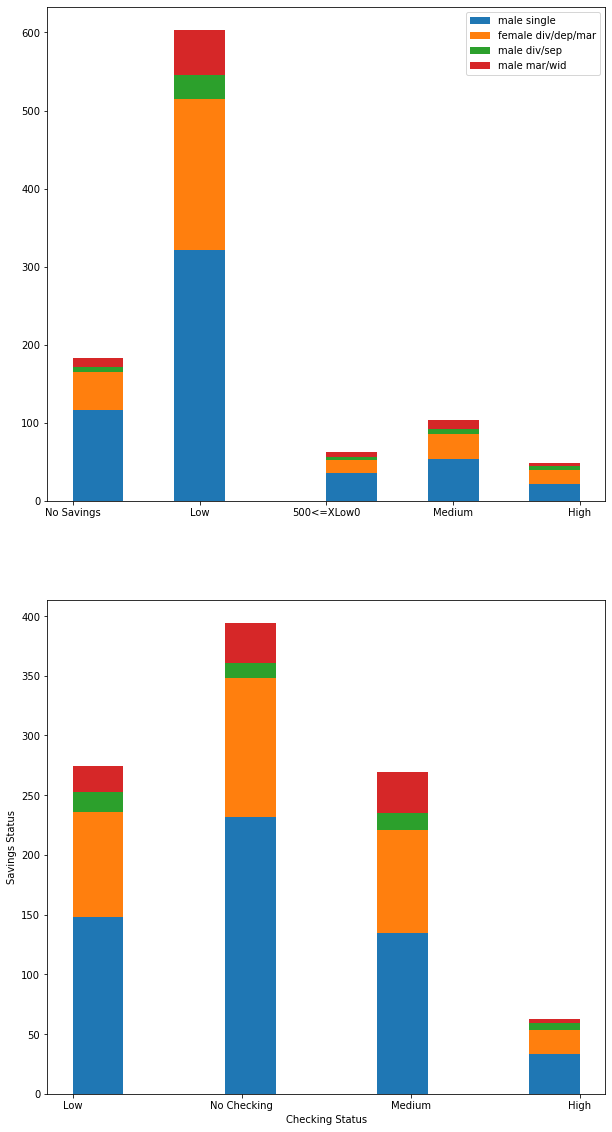

In [768]:
'''
Visualization (24 pts)

1. [9 pts] Plot subplots of two histograms: one with savings_status 
on the x-axis and personal_status as different colors, and another with 
checking_status on the x-axis and personal_status as different colors.
'''
personalStatus = list(dfpd.personal_status.unique())
fig, ref = plt.subplots(2, 1, figsize = (10, 20))
plt.xlabel("Checking Status")
plt.ylabel("Savings Status")

first = [dfpd[dfpd['personal_status'] == val].savings_status for val in personalStatus]
second = [dfpd[dfpd['personal_status'] == val].checking_status for val in personalStatus]

#first
ref[0].hist(first, label = personalStatus, stacked = 'True')
ref[0].legend()

#second
ref[1].hist(second, label = personalStatus, stacked = 'True')

plt.show()

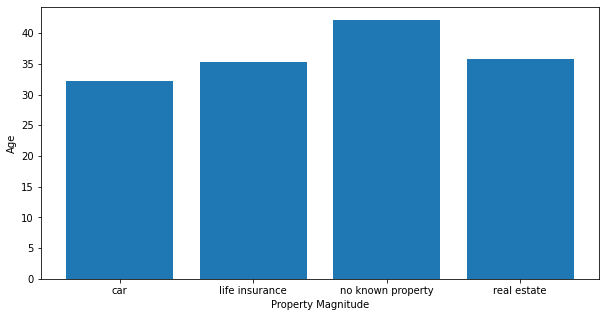

In [769]:
'''
2. [9 pts] For people having credit_amount more than 4000, 
plot a bar graph which maps property_magnitude (x-axis) to the 
average customer age for that magnitude (y-axis).
'''
newDf = dfpd[dfpd.credit_amount > 4000]
xAxis = newDf.groupby('property_magnitude').count()
yAxis = newDf.groupby('property_magnitude').sum()
dfBar = (yAxis['age']/xAxis['age']).reset_index()

plt.figure(figsize = (10, 5))
plt.xlabel("Property Magnitude")
plt.ylabel("Age")
plt.bar(dfBar['property_magnitude'], dfBar['age'])
plt.show()

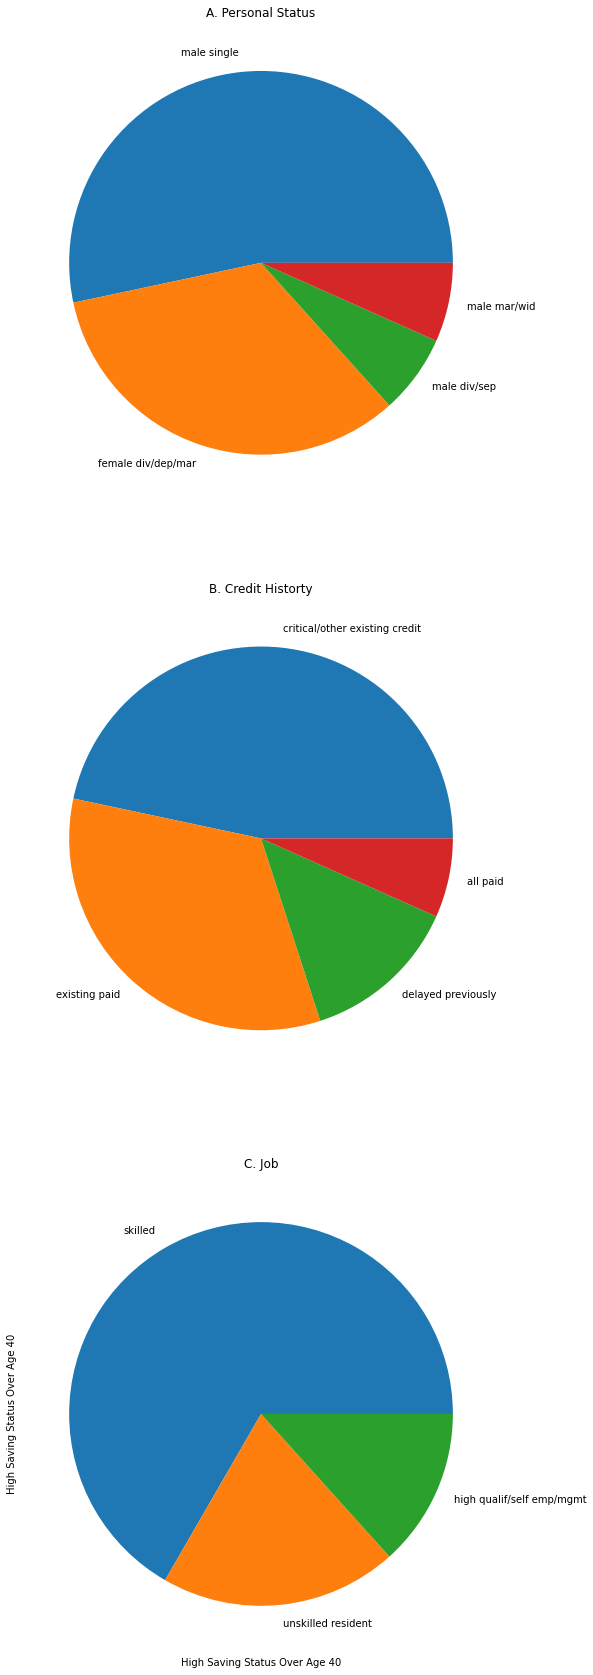

In [774]:
'''
3. [6 pts] For people with a "High" savings_status and age above 40, 
use subplots to plot the following pie charts:

Personal status
Credit history
Job
'''
anotherNewDf = (dfpd['age'] > 40) & (dfpd['savings_status'] == 'High')
pieChart = dfpd[anotherNewDf]
fig, ref = plt.subplots(3, 1, figsize = (50, 30), sharey=True, sharex=True)

#Personal Status
personalStatusPie = pieChart['personal_status'].value_counts().reset_index()
ref[0].pie(personalStatusPie['personal_status'], labels = personalStatusPie['index'])
ref[0].set_title("A. Personal Status")

#Credit History
creditHistoryPie = pieChart['credit_history'].value_counts().reset_index()
ref[1].pie(creditHistoryPie['credit_history'], labels = creditHistoryPie['index'])
ref[1].set_title("B. Credit Historty")

#Job
jobPie = pieChart['job'].value_counts().reset_index()
ref[2].pie(jobPie['job'], labels = jobPie['index'])
ref[2].set_title("C. Job")

plt.xlabel("High Saving Status Over Age 40")
plt.ylabel("High Saving Status Over Age 40")
plt.show()